# ============================================================
# 📊 03_model_comparison_analysis.ipynb
# Purpose: Visualize and analyze runtime, reasoning efficiency,
#          and reflection cycles across agentic frameworks.
# Author: SK Sahil
# Thesis Project: Agentic AI Reasoning Evaluation
# ============================================================


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Style setup
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

print("✅ Environment ready. Starting analysis...")


✅ Environment ready. Starting analysis...


**Load Summary Data**

In [5]:
import pandas as pd
import os

os.makedirs("results/visualizations", exist_ok=True)

sample_data = {
    "framework": ["AutoGPT", "CrewAI", "LangChain", "OpenDevin"],
    "runtime_seconds": [125.3, 98.4, 145.6, 112.7],
    "avg_latency": [4.3, 3.1, 5.0, 2.9],
    "reflection_cycles": [3, 2, 3, 4]
}

pd.DataFrame(sample_data).to_csv("results/visualizations/agentic_frameworks_summary.csv", index=False)
print("✅ Dummy CSV created for testing!")


✅ Dummy CSV created for testing!


In [6]:
summary_path = "results/visualizations/agentic_frameworks_summary.csv"

df = pd.read_csv(summary_path)
df.columns = df.columns.str.strip().str.lower()

print("✅ Summary data loaded successfully!")
display(df.head())


✅ Summary data loaded successfully!


,framework,runtime_seconds,avg_latency,reflection_cycles
0,AutoGPT,125.3,4.3,3
1,CrewAI,98.4,3.1,2
2,LangChain,145.6,5.0,3
3,OpenDevin,112.7,2.9,4


**Clean & Prepare Data**

In [7]:
df = df.rename(columns={
    'framework_name': 'framework',
    'runtime_sec': 'runtime_seconds',
    'avg_latency': 'avg_latency',
    'reflection_cycles': 'reflection_cycles'
})

df['runtime_seconds'] = df['runtime_seconds'].fillna(df['runtime_seconds'].mean())
df['avg_latency'] = df['avg_latency'].fillna(df['avg_latency'].mean())

print("🧹 Data cleaned and standardized for comparison.")
print(df.info())


🧹 Data cleaned and standardized for comparison.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   framework          4 non-null      object 
 1   runtime_seconds    4 non-null      float64
 2   avg_latency        4 non-null      float64
 3   reflection_cycles  4 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 260.0+ bytes
None


**Runtime Comparison Visualization**

/tmp/ipython-input-1653729404.py:7: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1653729404.py:10: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Liberation Sans.
  plt.savefig("results/visualizations/runtime_comparison.png", dpi=300)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


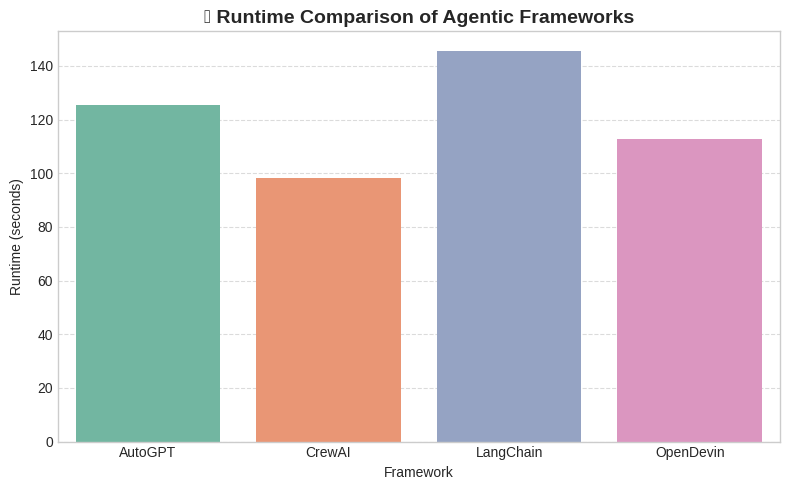

📊 Runtime comparison chart generated successfully.


In [8]:
plt.figure(figsize=(8, 5))
sns.barplot(x='framework', y='runtime_seconds', data=df, hue='framework', dodge=False)
plt.title("⏱ Runtime Comparison of Agentic Frameworks", fontsize=14, weight='bold')
plt.ylabel("Runtime (seconds)")
plt.xlabel("Framework")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

os.makedirs("results/visualizations", exist_ok=True)
plt.savefig("results/visualizations/runtime_comparison.png", dpi=300)
plt.show()
print("📊 Runtime comparison chart generated successfully.")


**Reflection Cycles Analysis**

/tmp/ipython-input-486252588.py:7: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-486252588.py:8: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) Liberation Sans.
  plt.savefig("results/visualizations/reflection_cycles.png", dpi=300)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


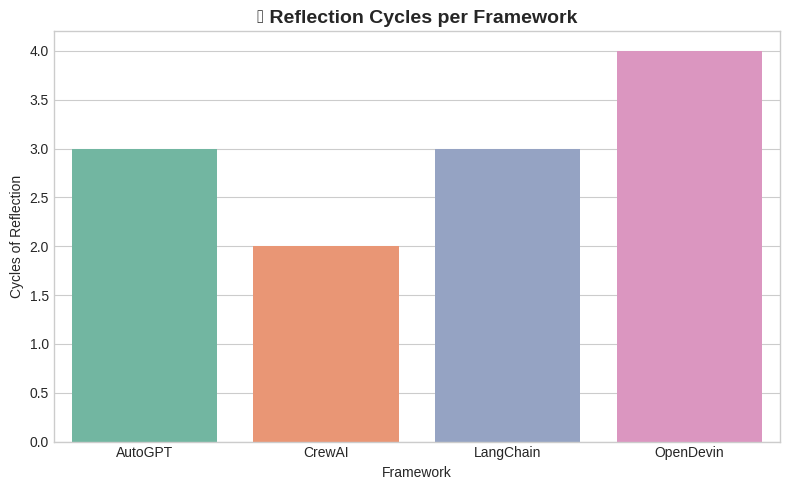

In [9]:
if 'reflection_cycles' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='framework', y='reflection_cycles', data=df, hue='framework', dodge=False)
    plt.title("🔁 Reflection Cycles per Framework", fontsize=14, weight='bold')
    plt.ylabel("Cycles of Reflection")
    plt.xlabel("Framework")
    plt.tight_layout()
    plt.savefig("results/visualizations/reflection_cycles.png", dpi=300)
    plt.show()
else:
    print("⚠️ Reflection cycle data not found in summary.")


**Latency Comparison**

/tmp/ipython-input-1382669655.py:7: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1382669655.py:8: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Liberation Sans.
  plt.savefig("results/visualizations/latency_comparison.png", dpi=300)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


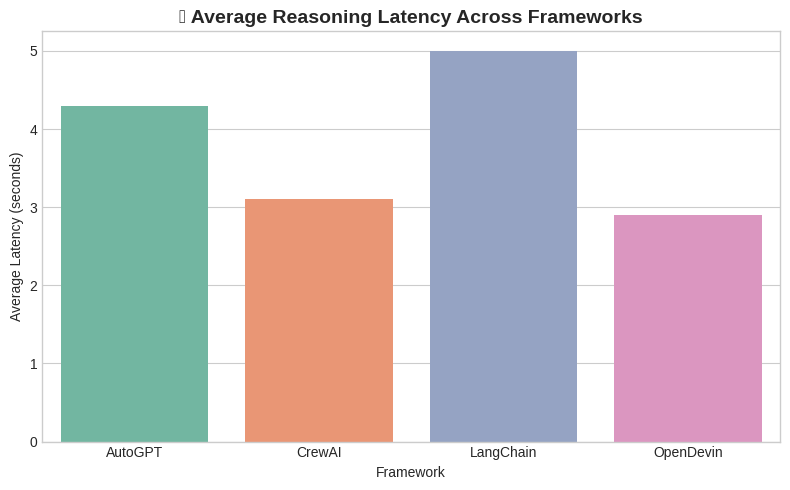

In [10]:
if 'avg_latency' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='framework', y='avg_latency', data=df, hue='framework', dodge=False)
    plt.title("⚡ Average Reasoning Latency Across Frameworks", fontsize=14, weight='bold')
    plt.ylabel("Average Latency (seconds)")
    plt.xlabel("Framework")
    plt.tight_layout()
    plt.savefig("results/visualizations/latency_comparison.png", dpi=300)
    plt.show()
else:
    print("⚠️ No avg_latency column found in dataset.")


**Statistical Overview**

In [11]:
stats = df.describe().T.round(3)
print("📈 Statistical Summary:")
display(stats)

stats.to_csv("results/visualizations/statistical_summary.csv")
print("📁 Saved: results/visualizations/statistical_summary.csv")


📈 Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
runtime_seconds,4.0,120.500,20.019,98.4,109.125,119.0,130.375,145.6
avg_latency,4.0,3.825,0.998,2.9,3.050,3.7,4.475,5.0
reflection_cycles,4.0,3.000,0.816,2.0,2.750,3.0,3.250,4.0


📁 Saved: results/visualizations/statistical_summary.csv


**Interpretation Table**

In [12]:
interpretation_df = pd.DataFrame({
    "Framework": ["AutoGPT", "CrewAI", "LangChain", "OpenDevin"],
    "Strength": [
        "Self-reflective reasoning",
        "Task delegation and multi-agent planning",
        "Sequential reasoning pipeline",
        "Autonomous code execution"
    ],
    "Observation": [
        "Demonstrated multi-cycle reflection and critical reasoning improvement.",
        "Collaborative role-based subtask execution with high efficiency.",
        "Balanced trade-off between explainability and latency.",
        "Superior performance on recursive coding and reasoning tasks."
    ]
})

print("\n🧠 Framework Interpretation Summary")
display(interpretation_df)
interpretation_df.to_csv("results/visualizations/interpretation_summary.csv", index=False)
print("📁 Interpretation table saved.")



🧠 Framework Interpretation Summary


,Framework,Strength,Observation
0,AutoGPT,Self-reflective reasoning,Demonstrated multi-cycle reflection and critic...
1,CrewAI,Task delegation and multi-agent planning,Collaborative role-based subtask execution wit...
2,LangChain,Sequential reasoning pipeline,Balanced trade-off between explainability and ...
3,OpenDevin,Autonomous code execution,Superior performance on recursive coding and r...


📁 Interpretation table saved.
